<a href="https://colab.research.google.com/github/Amrutha-Tsavatapalli/ACM-work/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ast
import tkinter as tk
from tkinter import ttk, messagebox

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tmdb_5000_movies.csv.zip to tmdb_5000_movies.csv.zip


In [ ]:
import zipfile

# Extract the zip file
with zipfile.ZipFile("tmdb_5000_movies.csv.zip", "r") as z:
    z.extract("tmdb_5000_movies.csv")  # Extract the movie dataset

print("Extraction complete!")


Extraction complete!


In [ ]:
##Code to Extract Unique Genre Names
import pandas as pd
import json

# Load the movies dataset
movies_df = pd.read_csv("tmdb_5000_movies.csv")

# Display the first few rows to inspect the structure
movies_df.head()

# Parse the `genres` column to extract genre names
def extract_genres(genres_str):
    genres_list = json.loads(genres_str)  # Parse the JSON string
    return [genre['name'] for genre in genres_list]  # Extract genre names

# Apply the function to extract genres
movies_df['genre_names'] = movies_df['genres'].apply(extract_genres)

# Flatten the list of genres and find unique genres
all_genres = [genre for genres in movies_df['genre_names'] for genre in genres]
unique_genres = set(all_genres)

# Display the unique genres
print("Unique genres:", unique_genres)


Unique genres: {'Horror', 'History', 'Family', 'Animation', 'Mystery', 'Comedy', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Documentary', 'Foreign', 'TV Movie', 'Fantasy', 'Music', 'Action', 'Science Fiction', 'Western', 'Crime', 'War'}


In [ ]:
print(features.head())


      budget                                      homepage  \
0  237000000                   http://www.avatarmovie.com/   
1  300000000  http://disney.go.com/disneypictures/pirates/   
2  245000000   http://www.sonypictures.com/movies/spectre/   
3  250000000            http://www.thedarkknightrises.com/   
4  260000000          http://movies.disney.com/john-carter   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spect

In [ ]:
genres_df = movies_df['genres'].str.join('|').str.get_dummies()
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.drop(columns=['genres'], inplace=True)

In [ ]:
# Check for missing values in the features
missing_values = features_numeric.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 budget          0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
                0
"               0
,               0
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
:               0
A               0
C               0
D               0
F               0
H               0
M               0
R               0
S               0
T               0
V               0
W               0
[               0
]               0
a               0
c               0
d               0
e               0
g               0
h               0
i               0
l               0
m               0
n               0
o               0
r               0
s               0
t               0
u               0
v               0
y               0
{               0
}               0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Use SimpleImputer to fill missing values (e.g., with mean)
imputer = SimpleImputer(strategy='mean')
features_numeric_imputed = imputer.fit_transform(features_numeric)

# Now apply KMeans
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(features_numeric_imputed)


KMeans(n_clusters=1, n_init=10, random_state=42)

In [ ]:
movies_df.head()

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,n,o,r,s,t,u,v,y,{,}
0,237000000,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,1,1,1,1,1,1,1,1,1
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,1,1,1,1,1,1,1,1,1
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,1,1,1,0,1,1,1,0,1,1
3,250000000,http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,1,1,0,1,0,0,0,1,1
4,260000000,http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1,1,1,0,1,1,1,0,1,1


In [ ]:
# Save the modified DataFrame with the extracted genre names to a new CSV file
movies_df.to_csv("modified_tmdb_5000_movies.csv", index=False)

print("Modified data saved to 'modified_tmdb_5000_movies.csv'")

Modified data saved to 'modified_tmdb_5000_movies.csv'


In [ ]:
features = movies_df.drop(['title', 'id'], axis=1)
##Extracting the feature and target variables

In [ ]:
target_variable=movies_df['title']

In [ ]:
# Check the data types of each column
print(features.dtypes)


budget                int64
homepage             object
keywords             object
original_language    object
original_title       object
                      ...  
u                     int64
v                     int64
y                     int64
{                     int64
}                     int64
Length: 64, dtype: object


In [ ]:
# Select only numeric columns
features_numeric = features.select_dtypes(include=['number'])

# Check the first few rows to confirm
print(features_numeric.head())


      budget  popularity     revenue  runtime  vote_average  vote_count     "  \
0  237000000  150.437577  2787965087    162.0           7.2       11800  1  1   
1  300000000  139.082615   961000000    169.0           6.9        4500  1  1   
2  245000000  107.376788   880674609    148.0           6.3        4466  1  1   
3  250000000  112.312950  1084939099    165.0           7.6        9106  1  1   
4  260000000   43.926995   284139100    132.0           6.1        2124  1  1   

   ,  0  ...  n  o  r  s  t  u  v  y  {  }  
0  1  0  ...  1  1  1  1  1  1  1  1  1  1  
1  1  0  ...  1  1  1  1  1  1  1  1  1  1  
2  1  1  ...  1  1  1  0  1  1  1  0  1  1  
3  1  1  ...  1  1  1  0  1  0  0  0  1  1  
4  1  0  ...  1  1  1  0  1  1  1  0  1  1  

[5 rows x 52 columns]


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
features_numeric_imputed = imputer.fit_transform(features_numeric)

# Check the transformed data
print(features_numeric_imputed[:5])



[[2.37000000e+08 1.50437577e+02 2.78796509e+09 1.62000000e+02
  7.20000000e+00 1.18000000e+04 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.00000000e+08 1.39082615e+02 9.61000000e+08 1.69000000e+02
  6.90000000e+00 4.50000000e+03 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.000

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(features_numeric_imputed)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans with the cleaned numeric data
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(features_numeric_imputed)

# Print the cluster centers
print("Cluster centers:", kmeans.cluster_centers_)


Cluster centers: [[ 7.31865896e+07  4.53023773e+01  2.56654378e+08  1.15080229e+02
   6.41647564e+00  1.77633238e+03  1.00000000e+00  1.00000000e+00
   1.00000000e+00  5.11461318e-01  7.90830946e-01  5.85959885e-01
   6.83381089e-01  3.96848138e-01  7.34957020e-01  2.32091691e-01
   5.58739255e-01  7.12034384e-01  2.46418338e-01  1.00000000e+00
   5.65902579e-01  4.67048711e-01  3.23782235e-01  4.01146132e-01
   9.16905444e-02  1.14613181e-01  1.66189112e-01  1.59025788e-01
   2.92263610e-01  4.33680869e-18  5.01432665e-02  1.00000000e+00
   1.00000000e+00  1.00000000e+00  5.94555874e-01  1.00000000e+00
   1.00000000e+00 -1.07552856e-16  2.92263610e-01  1.00000000e+00
   4.78510029e-01  1.00000000e+00  1.00000000e+00  8.61031519e-01
   7.75071633e-01  3.10888252e-01  6.96275072e-01  3.48137536e-01
   3.22349570e-01  6.04584527e-01  1.00000000e+00  1.00000000e+00]
 [ 1.72154211e+07  1.42926286e+01  2.70776392e+07  1.04763725e+02
   6.00815915e+00  3.54909595e+02  9.92948879e-01  9.92948

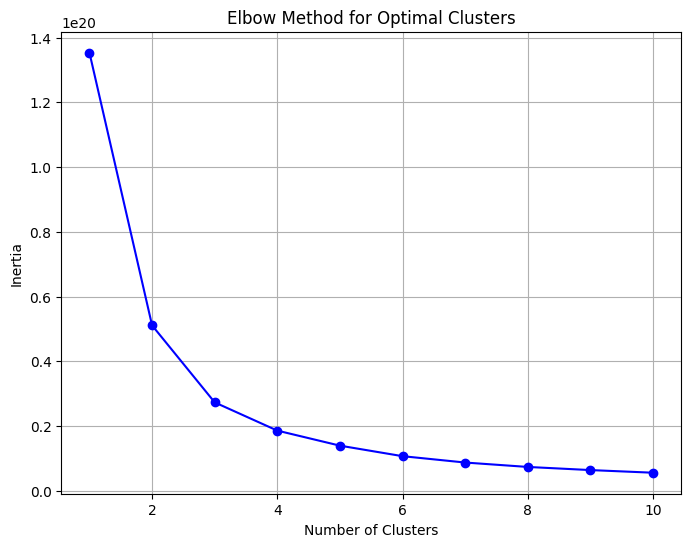

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate inertia for different numbers of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(features_numeric_imputed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Find the optimal number of clusters using the elbow method
# Calculate the differences between consecutive inertia values
differences = np.diff(inertia)

# Find the point where the difference between consecutive inertia values is the greatest
optimal_k = np.argmax(differences) + 2  # +2 because np.diff reduces the length by 1

print(f"The optimal number of clusters is: {optimal_k}")


The optimal number of clusters is: 10


In [ ]:
## Fit the KMeans Model with the Optimal Number of Clusters
# Fit the KMeans model using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(features_numeric_imputed)

# Get the cluster labels (which cluster each data point belongs to)
cluster_labels = kmeans.labels_

# Add the cluster labels to the original data for analysis
movies_df['Cluster'] = cluster_labels


In [ ]:
# View the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print(f"Cluster Centers: \n{cluster_centers}")


Cluster Centers: 
[[ 9.21253731e+07  5.47049996e+01  3.35547691e+08  1.17412935e+02
   6.50099502e+00  2.28146766e+03  1.00000000e+00  1.00000000e+00
   1.00000000e+00  5.22388060e-01  8.50746269e-01  6.61691542e-01
   6.11940299e-01  4.12935323e-01  6.81592040e-01  2.58706468e-01
   5.97014925e-01  7.41293532e-01  2.43781095e-01  1.00000000e+00
   6.96517413e-01  3.83084577e-01  2.43781095e-01  4.72636816e-01
   3.48258706e-02  1.19402985e-01  1.64179104e-01  2.08955224e-01
   2.93532338e-01  5.20417043e-18  4.47761194e-02  1.00000000e+00
   1.00000000e+00  1.00000000e+00  6.66666667e-01  1.00000000e+00
   1.00000000e+00  1.99493200e-17  2.93532338e-01  1.00000000e+00
   5.12437811e-01  1.00000000e+00  1.00000000e+00  8.70646766e-01
   8.00995025e-01  3.18407960e-01  8.00995025e-01  4.67661692e-01
   4.32835821e-01  5.62189055e-01  1.00000000e+00  1.00000000e+00]
 [ 3.30904174e+07  2.09301760e+01  4.48616104e+07  1.09960375e+02
   6.13180396e+00  5.42144943e+02  1.00000000e+00  1.0000

In [ ]:
##Function to format genre input
def format_genre(genre):
    return genre.title()

In [ ]:
##Function to recommend movies based on title
def recommend_by_title(movie_title, num_recommendations=10):
    if movie_title in movies_df['title'].values:
        movie_cluster = movies_df.loc[movies_df['title'] == movie_title, 'Cluster'].values[0]
        similar_movies = movies_df[movies_df['Cluster'] == movie_cluster]
        similar_movies = similar_movies[similar_movies['title'] != movie_title]
    else:
        return f"Movie title '{movie_title}' not found in the dataset."

    if similar_movies.empty:
        return "No recommendations available based on the provided movie title."

    return similar_movies.head(num_recommendations)['title']

In [ ]:
##Function to recommend movies based on genre
def recommend_by_genre(genre, num_recommendations=10):
    formatted_genre = format_genre(genre)
    if formatted_genre in genres_df.columns:
        similar_movies = movies_df[movies_df[formatted_genre] == 1]
    else:
        return f"Please enter a proper Genre."

    if similar_movies.empty:
        return "No recommendations available based on the provided genre."

    return similar_movies.head(num_recommendations)['title']

In [ ]:
##Neccessary functions for working of GUI
def update_title_suggestions(event):
    typed_text = title_combobox.get().strip().lower()
    if typed_text:
        suggestions = [title for title in data_df['title'] if typed_text in title.lower()]
        title_combobox['values'] = suggestions
    else:
        title_combobox['values'] = []

In [ ]:
def on_submit_title(event=None):
    user_input = title_combobox.get().strip()
    if user_input:
        recommendations = recommend_by_title(movie_title=user_input)
        if isinstance(recommendations, str):  # Check if it's an error message
            title_feedback_label.config(text=recommendations)
        else:
            title_result_text.delete(1.0, tk.END)
            for movie in recommendations:
                title_result_text.insert(tk.END, movie + '\n')
            title_feedback_label.config(text="These are your recommendations.")
    else:
        title_feedback_label.config(text="Please enter a movie title.")

In [ ]:
def on_submit_genre(event=None):
    user_input = genre_entry.get().strip()
    if user_input:
        recommendations = recommend_by_genre(genre=user_input)
        if isinstance(recommendations, str):  # Check if it's an error message
            genre_feedback_label.config(text=recommendations)
        else:
            genre_result_text.delete(1.0, tk.END)
            for movie in recommendations:
                genre_result_text.insert(tk.END, movie + '\n')
            genre_feedback_label.config(text="These are your recommendations.")
    else:
        genre_feedback_label.config(text="Please enter a genre.")

In [ ]:
def go_back_from_title():
    title_result_text.delete(1.0, tk.END)
    title_feedback_label.config(text="")
    title_combobox.set('')

    title_frame.grid_forget()
    main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

In [ ]:
def go_back_from_genre():
    genre_result_text.delete(1.0, tk.END)
    genre_feedback_label.config(text="")
    genre_entry.delete(0, tk.END)

    genre_frame.grid_forget()
    main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

In [ ]:
def show_recommendations_by_title():
    main_frame.grid_forget()
    title_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

def show_recommendations_by_genre():
    main_frame.grid_forget()
    genre_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

In [ ]:
##GUI using tkinter
root = tk.Tk()
root.title("Movie Recommendation System")
root.configure(bg='lightblue')

style = ttk.Style()
style.configure('TFrame', background='lightblue')
style.configure('TLabel', background='lightblue')
style.configure('TEntry', fieldbackground='lightblue')
style.configure('TButton', background='lightblue')
style.configure('TCombobox', background='lightblue')

frame_width = 600
frame_height = 400

# Main menu frame
main_frame = ttk.Frame(root, padding="20", style='TFrame', width=frame_width, height=frame_height)
main_frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

label1 = ttk.Label(main_frame, text="Movie Recommendation System", style='TLabel', font=("Comic Sans MS", 16, 'bold'))
label1.grid(row=0, column=0, columnspan=3, pady=20, sticky='n')

genre_button = ttk.Button(main_frame, text="Get Recommendations by Genre", command=show_recommendations_by_genre, style='TButton')
genre_button.grid(row=1, column=0, columnspan=3, pady=10)

movie_button = ttk.Button(main_frame, text="Get Recommendations by Movie Title", command=show_recommendations_by_title, style='TButton')
movie_button.grid(row=2, column=0, columnspan=3, pady=10)

# Movie title recommendations frame
title_frame = ttk.Frame(root, padding="20", style='TFrame', width=frame_width, height=frame_height)
title_frame.grid_forget()

title_instructions_label = ttk.Label(title_frame, text="Enter a movie title to get recommendations.", style='TLabel', font=("Comic Sans MS", 12))

title_combobox = ttk.Combobox(title_frame, width=50)
title_combobox.bind('<KeyRelease>', update_title_suggestions)
title_combobox.bind('<Return>', on_submit_title)

title_button = ttk.Button(title_frame, text="Get Recommendations", command=on_submit_title, style='TButton')

title_result_text = tk.Text(title_frame, width=50, height=15)

title_feedback_label = ttk.Label(title_frame, text="", style='TLabel', font=("Comic Sans MS", 10), foreground='black')

title_back_button = ttk.Button(title_frame, text="Back", command=go_back_from_title, style='TButton')

title_instructions_label.grid(row=0, column=0, columnspan=3, pady=15, sticky='n')
title_combobox.grid(row=1, column=0, columnspan=3, pady=5, sticky='ew')
title_button.grid(row=2, column=0, columnspan=3, pady=10)
title_result_text.grid(row=3, column=0, columnspan=3, pady=10)
title_feedback_label.grid(row=4, column=0, columnspan=3, pady=5)
title_back_button.grid(row=5, column=0, columnspan=3, pady=10)

# Genre recommendations frame
genre_frame = ttk.Frame(root, padding="20", style='TFrame', width=frame_width, height=frame_height)
genre_frame.grid_forget()

genre_instructions_label = ttk.Label(genre_frame, text="Enter a genre to get recommendations.", style='TLabel', font=("Comic Sans MS", 12))

genre_entry = ttk.Entry(genre_frame, width=50)
genre_entry.bind('<Return>', on_submit_genre)

genre_button = ttk.Button(genre_frame, text="Get Recommendations", command=on_submit_genre, style='TButton')

genre_result_text = tk.Text(genre_frame, width=50, height=15)

genre_feedback_label = ttk.Label(genre_frame, text="", style='TLabel', font=("Comic Sans MS", 10), foreground='black')

genre_back_button = ttk.Button(genre_frame, text="Back", command=go_back_from_genre, style='TButton')

genre_instructions_label.grid(row=0, column=0, columnspan=3, pady=15, sticky='n')
genre_entry.grid(row=1, column=0, columnspan=3, pady=5, sticky='ew')
genre_button.grid(row=2, column=0, columnspan=3, pady=10)
genre_result_text.grid(row=3, column=0, columnspan=3, pady=10)
genre_feedback_label.grid(row=4, column=0, columnspan=3, pady=5)
genre_back_button.grid(row=5, column=0, columnspan=3, pady=10)

root.mainloop()

TclError: no display name and no $DISPLAY environment variable